In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/home/atiyeh/Documents/AmirUsefi/ML/ml/ml/ToyotaCorolla.csv")

In [3]:
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


(array([ 110.,  706.,  343.,  114.,   75.,   59.,   22.,    4.,    0.,    3.]),
 array([  4350.,   7165.,   9980.,  12795.,  15610.,  18425.,  21240.,
         24055.,  26870.,  29685.,  32500.]),
 <a list of 10 Patch objects>)

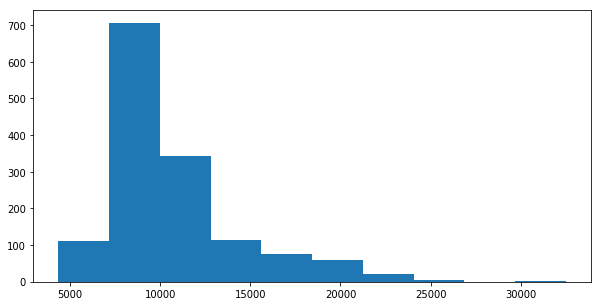

In [5]:
plt.figure(figsize=(10,5))
plt.hist(np.sort(data['Price']))

In [5]:
import seaborn as sns

In [6]:
#Following columns are quantitative
# Price        1436 non-null int64
#Age          1436 non-null int64
#KM           1436 non-null int64
#HP           1436 non-null int64
#CC           1436 non-null int64
#Doors        1436 non-null int64
#Weight       1436 non-null int64

In [7]:
#Convert the categorical variables to dummy variables
#FuelType     1436 non-null object

In [11]:
dummy_fuel = pd.get_dummies(data['FuelType'], drop_first='True')

In [12]:
print(dummy_fuel)

      Diesel  Petrol
0          1       0
1          1       0
2          1       0
3          1       0
4          1       0
...      ...     ...
1431       0       1
1432       0       1
1433       0       1
1434       0       1
1435       0       1

[1436 rows x 2 columns]


In [13]:
type(dummy_fuel)

pandas.core.frame.DataFrame

In [14]:
from collections import Counter
Counter(data['FuelType'])

Counter({'Diesel': 155, 'Petrol': 1264, 'CNG': 17})

In [15]:
data_new = pd.concat([data, dummy_fuel], axis=1)

In [17]:
data_new.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [18]:
data=data_new.drop('FuelType', axis=1)

In [19]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

# Data Exploratory Analysis

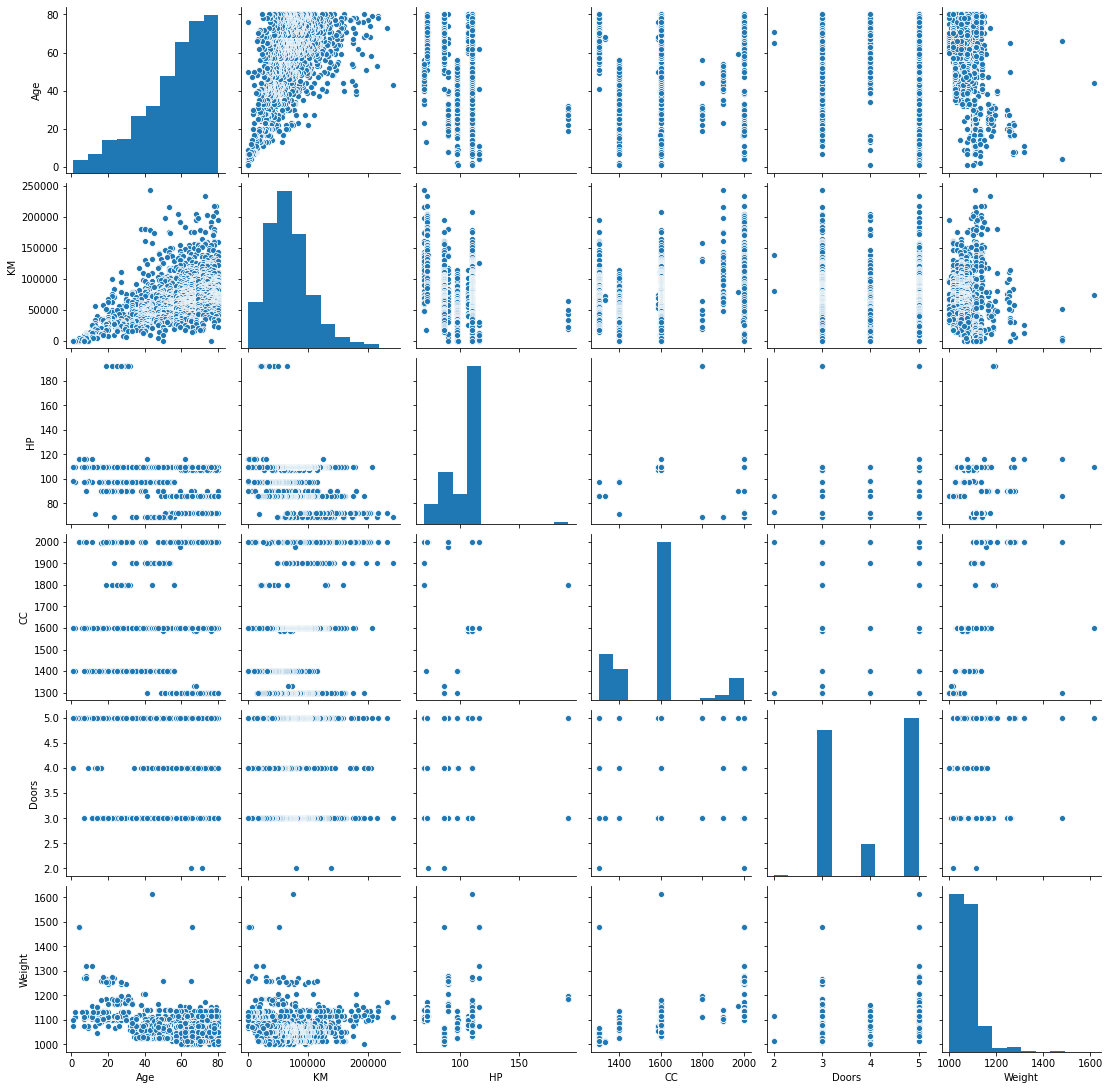

In [20]:
sns.pairplot(data[['Age','KM','HP','CC','Doors','Weight']])

## check for outliers using box plot

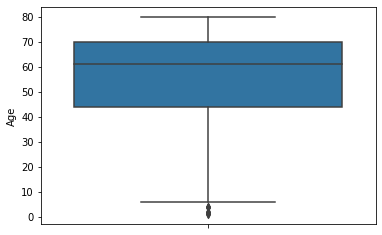

In [21]:
#sns.pairplot(data[['Age','KM','HP','CC','Doors','Weight']])
sns.boxplot('Age', data=data, orient='v')

In [22]:
data['Age'].describe()

count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

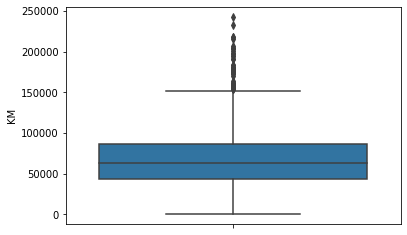

In [23]:
sns.boxplot(x='KM', data=data, orient='v')

In [24]:
data['KM'].describe()

count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64

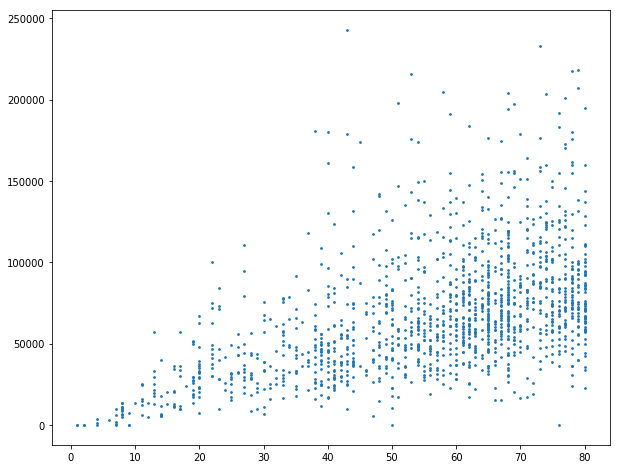

In [22]:
#check scatterplot of Age and KM to see if as age increases number of kms increases
plt.figure(figsize=(10,8))
plt.scatter(x=data['Age'], y=data['KM'], s=3)
#the scatter plot shows that as the age of the vehicle increases, so does the distance. With an exception of a 
#few vehicles. Whih are acceptable outliers

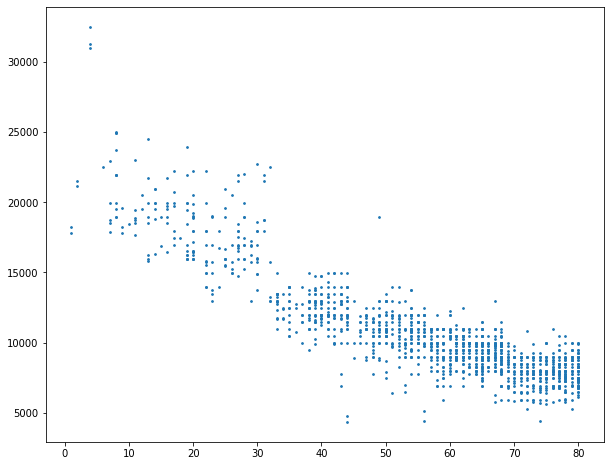

In [25]:
#check the scatterplot of age and price
plt.figure(figsize=(10,8))
plt.scatter(x=data['Age'], y=data['Price'], s=3)
#so.. older the vehicle, lesser the price 

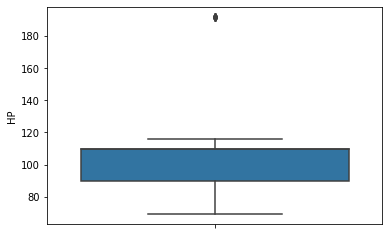

In [26]:
#check for outliers of the rest of the quantitative variables
sns.boxplot(x='HP', data=data, orient='v')

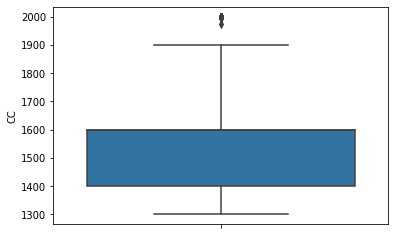

In [27]:
sns.boxplot(x='CC', data=data, orient='v')

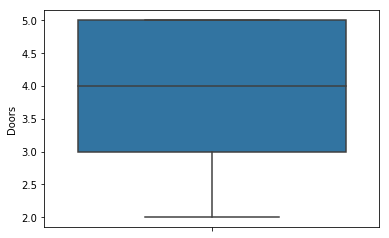

In [26]:
sns.boxplot(x='Doors', data=data, orient='v')

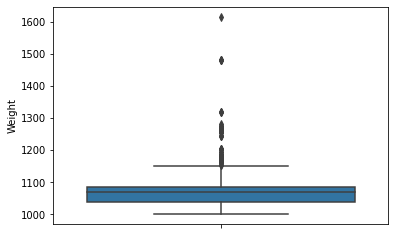

In [28]:
sns.boxplot(x='Weight', data=data, orient='v')

In [29]:
data['Weight'].describe()

count    1436.00000
mean     1072.45961
std        52.64112
min      1000.00000
25%      1040.00000
50%      1070.00000
75%      1085.00000
max      1615.00000
Name: Weight, dtype: float64

In [30]:
data['Price'].describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

# Modelling

In [30]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [31]:
#Split the x and y variables 
y = data['Price']
x = data.iloc[:,1:]

In [35]:
x.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [38]:
y.column='Price'
type(y)

pandas.core.series.Series

In [39]:
y.head(5)

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [41]:
#Split the data to train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=365)

In [36]:
x_train.head(5)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
796,60,74337,86,0,0,1300,5,1035,0,1
352,38,26262,110,1,0,1600,5,1075,0,1
768,59,78750,90,1,0,1975,5,1155,1,0
772,61,78063,107,1,1,1600,5,1100,0,1
68,22,30000,110,1,0,2000,5,1275,1,0


In [37]:
x_test.head(5)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
42,22,46961,97,0,0,1400,3,1100,0,1
1012,66,36658,110,0,0,1600,3,1050,0,1
547,55,44537,97,0,0,1400,3,1025,0,1
366,35,21904,97,0,0,1400,3,1025,0,1
1354,79,60142,110,0,0,1600,3,1050,0,1


In [42]:
print(len(x_test))

359


In [43]:
y_train.head(5)

796    11950
352    12450
768    10950
772     9500
68     22250
Name: Price, dtype: int64

In [40]:
y_test.head(5)

42      13950
1012     9950
547      9950
366     10950
1354     9450
Name: Price, dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lr_predict = lr.predict(x_test)

In [44]:
print(lr_predict)

[ 15922.40047874   9694.19162534  10529.31638088  13366.55717546
   7703.53991069  11293.05357065  14854.51858167   7926.32786907
  10219.87726585  11056.53699706  12826.29391104  10263.59124494
  16926.10863352  17990.29446136  10027.15961851  10994.97510922
   7623.42359281  10111.31483935   8852.27784972   7403.13940629
   9691.29343977   8109.53668204   8057.89009285  12316.45277246
   7832.9775925   16397.7962566   11603.74800593  10160.63322655
  15684.94293847   9932.52924735  10785.8989783    8051.01772333
   8270.6181485   15978.43237782  11184.54301916   7904.11181537
  20771.60239757   9428.46077266   8777.05986558   9797.15157636
   5933.48892474  12684.25125591  15709.87248469  11198.45420135
   9371.7545852    5012.88646431   9493.74358235   8634.60701794
  20063.33129622   8929.16031644   9763.47346781  17479.08334116
  10009.4177025    9068.92266969   6689.83284127   9985.22093373
  16633.27109142  15920.09574553   7288.1748989   15743.58889247
  18901.41265624  16824.0

In [45]:
print(len(lr_predict))

359


In [47]:
#To evaluate model performance, calculate R2 value, RMSE, and explained variance score
#R2value - Greater the better
# RMSE - Need to find out
# Explained variance score - 1.0 is perfect. Lower value, worse is the model
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [48]:
r2_score(y_test, lr_predict)

0.8870487623633435

In [49]:
mean_squared_error(y_test,lr_predict)

1541950.7009215103

In [50]:
explained_variance_score(y_test,lr_predict)

0.8879397695060212

In [51]:
print(lr.intercept_)
print(lr.coef_)

-1745.5694477661873
[-1.22970759e+02 -1.66935724e-02  6.37882269e+01  4.93867878e+01
  3.83917462e+02 -4.50863389e+00  1.49149478e+01  1.83401905e+01
  3.68619751e+03  1.06294856e+03]


In [52]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [53]:
names=[]
for i in data.columns:
   names.append(i) 
print (names)

['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight', 'Diesel', 'Petrol']


In [54]:
names.remove('Price')

In [55]:
pd.DataFrame(list(zip(names, lr.coef_)), columns = ['Names', 'Co-efficients'])

,Names,Co-efficients
0,Age,-122.970759
1,KM,-0.016694
2,HP,63.788227
3,MetColor,49.386788
4,Automatic,383.917462
5,CC,-4.508634
6,Doors,14.914948
7,Weight,18.340190
8,Diesel,3686.197512
9,Petrol,1062.948563


## Calculation of variable significance

In [58]:
import statsmodels.api as sm

In [56]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [57]:
model1 = sm.OLS(y_train, x_train)

In [58]:
result = model1.fit()

In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7540.
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:34:09   Log-Likelihood:                -9279.9
No. Observations:                1077   AIC:                         1.858e+04
Df Residuals:                    1067   BIC:                         1.863e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -124.2012      2.909    -42.697      0.0

In [59]:
#by hypothesis testing, the following fields are significant
#Age, KM, HP, Automatic, CC, Weight, Diesel, Petrol
#model using the Above fields. Drop Doors and MetColor
x.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [60]:
x_new=x.drop(['MetColor','Doors'],axis=1)

In [61]:
x_new.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Weight', 'Diesel', 'Petrol'], dtype='object')

In [62]:
x_new_train, x_new_test, y_train_new, y_test_new = train_test_split(x_new, y, test_size = 0.25)

In [63]:
x_new.shape

(1436, 8)

In [64]:
x_new_train.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Weight', 'Diesel', 'Petrol'], dtype='object')

In [65]:
lr_new = LinearRegression()

In [66]:
lr_new.fit(x_new_train,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lr_predict_new = lr_new.predict(x_new_test)

In [68]:
print(lr_new.intercept_)
print(lr_new.coef_)

-1907.3919287200224
[-1.21221462e+02 -1.80373795e-02  6.53804797e+01  3.15585137e+02
 -4.41599999e+00  1.80031724e+01  4.21539806e+03  1.32793647e+03]


In [69]:
names_new = []
for j in x_new.columns:
    names_new.append(j)
print(names_new)

['Age', 'KM', 'HP', 'Automatic', 'CC', 'Weight', 'Diesel', 'Petrol']


In [70]:
pd.DataFrame(list(zip(names_new, lr_new.coef_)), columns=['Names', 'New Co-efficients'])

,Names,New Co-efficients
0,Age,-121.221462
1,KM,-0.018037
2,HP,65.380480
3,Automatic,315.585137
4,CC,-4.416000
5,Weight,18.003172
6,Diesel,4215.398055
7,Petrol,1327.936465


In [71]:
#check model performance by computing R2 value and explained_variance_score
print(r2_score(y_test_new,lr_predict_new))
print(explained_variance_score(y_test_new,lr_predict_new))

0.8730979335381296
0.8732111668252278


In [72]:
#check the R2 and adjusted R2 for x_new dataset 
model2 = sm.OLS(y_train_new,x_new_train)
result2 = model2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              9805.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:08:28   Log-Likelihood:                         -9259.3
No. Observations:                1077   AIC:                                  1.853e+04
Df Residuals:                    1069   BIC:                                  1.857e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### My thoughts on the result

1. R2_score for model2 is higher than model1.
2. R2 and Adjusted R2 values seem to both remain unchanged between the 2 models created (model1 and model2). This means that the removal of the Doors and MetColor columns did not make much of a difference to the model performance. NOTE - Adjusted R2 increases only when the addition of a new predictor increases it value.
3. Durbin-Watson test 
    a. model1 is 2.050. Which means that there is no autocorrelation in the errors of the predicted values. 
    b. model2 is 1.959 (rounded off to 2). Which means that there is no autocorrelation in the errors of the predicted
    values.
4. Predited R2.. How do I calculate that!?? Is it the same as AIC (Akaike Information Criterion)? Lower the AIC, better the ability of the model to predict future values. Anyway, my second model has lower AIC as compared to the first. 

#### Considering all the points mentioned above, I can deduce that model2 (without columns MetColor and Doors) is a much better performing model than model1 (which contains all columns from the original test data)